# Student Performance Indicator

<b>Problem Statement:</b>

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.



The source data is available [here](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
The data contains the following features:
* gender: gender of the student
* race/ethnicity: ethnicity of the student divided into groups
* parental_level_of_education: Highest level of parents' education 
* lunch: having lunch before test 
* test_prepaeation_course: complete or not complete before the test
* math_score: Marks in maths
* reading_score: Marks in reading
* writing_score: Marks in writingg score

## Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing data

In [59]:
df = pd.read_csv('data/stud.csv')

In [60]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [61]:
df.shape

(1000, 8)

The dataset contains 1000 rows and 8 columns. 

Out of the 8 columns, gender, race_ethnicity, parental_level_of_education, lunch and test_preparation_course are categorical values.

math_score, reading_score, writing_score are numerical columns

## Checking for missing values

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [63]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset. Let us now analyse the data

In [64]:
df.nunique()

gender                          2
race/ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Categorical columns have less number of values. Let us check the unique values in each column.

In [65]:
print("Categories in 'gender': ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity': ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education': ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch': ")
print(df['lunch'].unique())

print("Categories in 'test preparation course': ")
print(df['test_preparation_course'].unique())

Categories in 'gender': 
['female' 'male']
Categories in 'race/ethnicity': 
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education': 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch': 
['standard' 'free/reduced']
Categories in 'test preparation course': 
['none' 'completed']


Let us now check the numerical columns and try to draw some insights from the same

In [66]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From above description of numerical data, 
* All means are very close to each other - between 66 and 69.16;
* All standard deviations are also close - between 14.6 and 15.19;
* The minimum score for math is 0, whereas it is significantly higher for writing at 10, and even higher for reading at 17.
* The quartiles for each test also are quite close to each other, with the highest score for all three being 100

In [67]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total Score']/3
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [68]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

print('Number of students with full marks in Maths:', math_full)
print('Number of students with full marks in Writing:', writing_full)
print('Number of students with full marks in Reading:', reading_full)

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [69]:
reading_less_20 = df[df['reading_score'] <= 20]['reading_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['writing_score'].count()
math_less_20 = df[df['math_score'] <= 20]['math_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


From the analysis above, we can conclude that the overall best performances are in reading and the worst are in maths

## Data Visualisation

### Univariate Analysis

Let us perform some data visualisation to identify patterns in the data. 

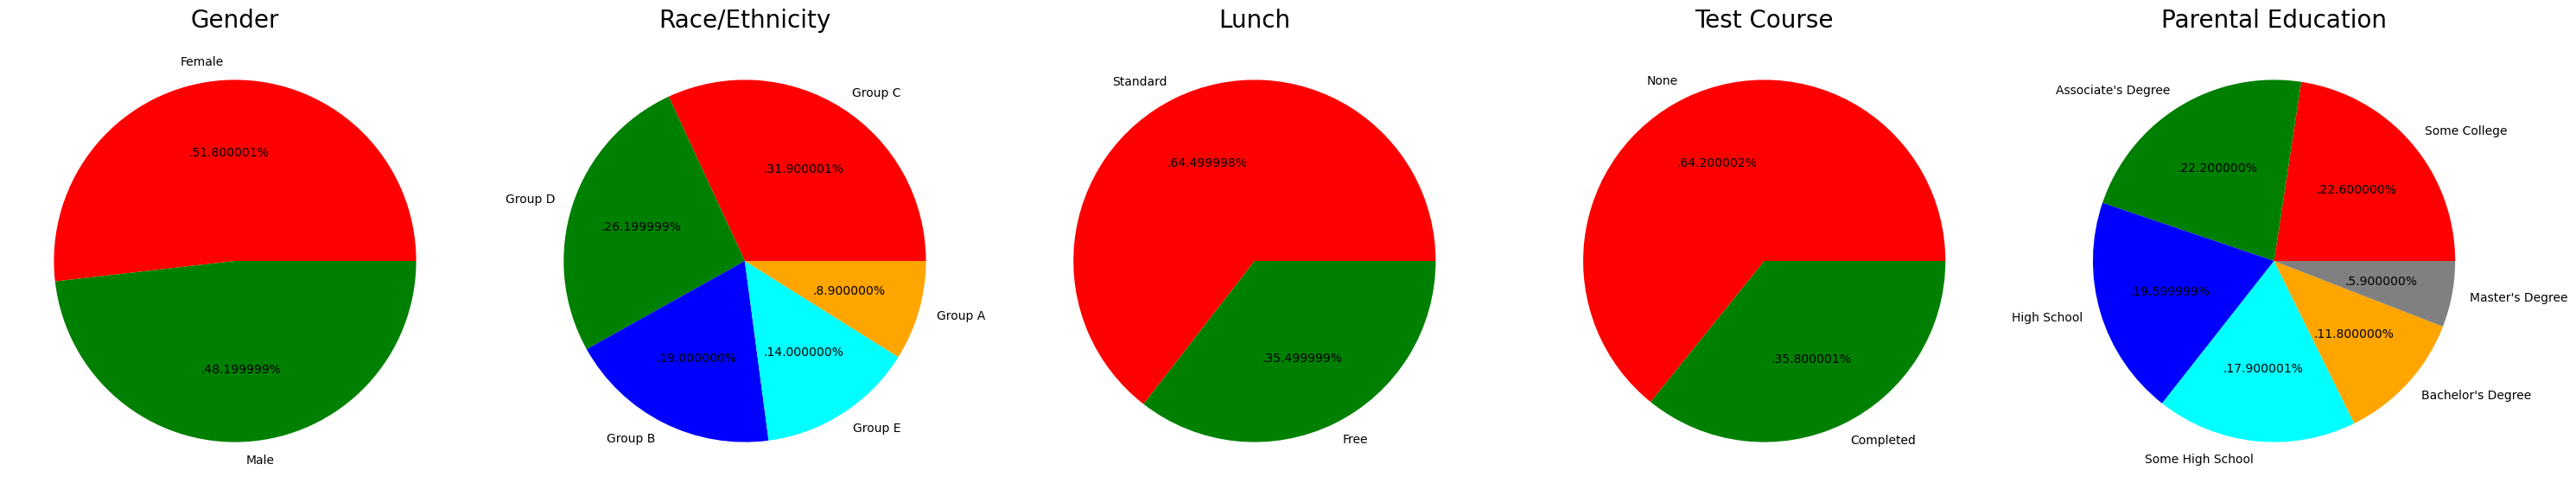

In [91]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

From the pie chart above, we can see that:

* Number of male and female students is almost same
* Most students belong to enthnic group C and D
* Most of the students have standard lunch
* Most stidents have not taken a test course
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


### Multivariate Analysis

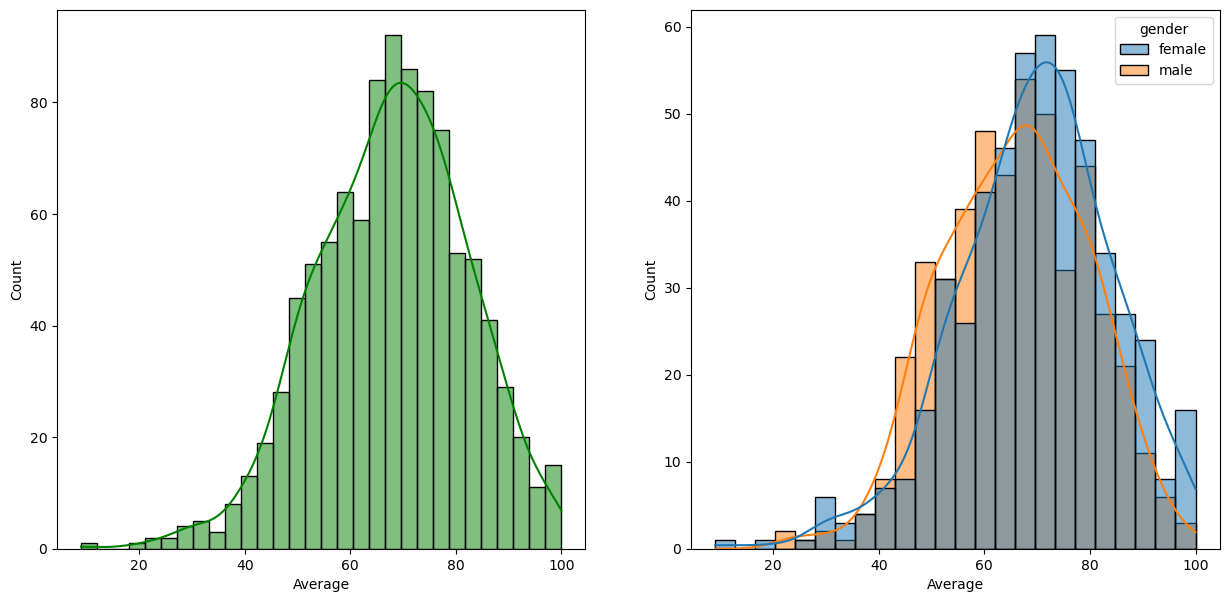

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

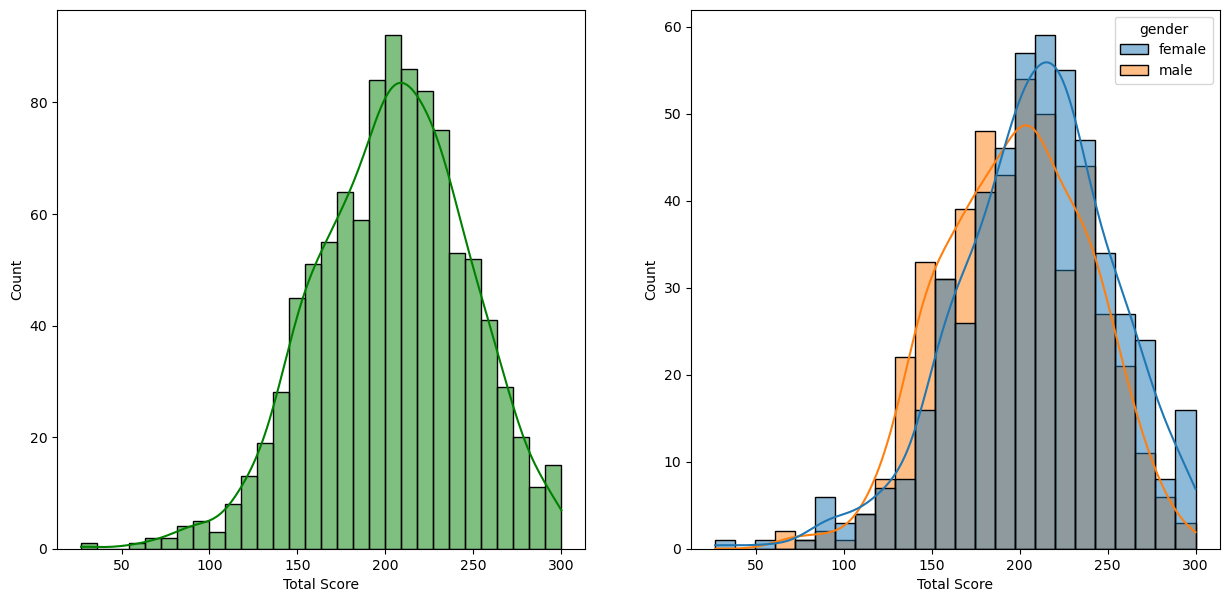

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')
plt.show()

Based on the graphs above, we can conclude that female students tend to perform better than male students

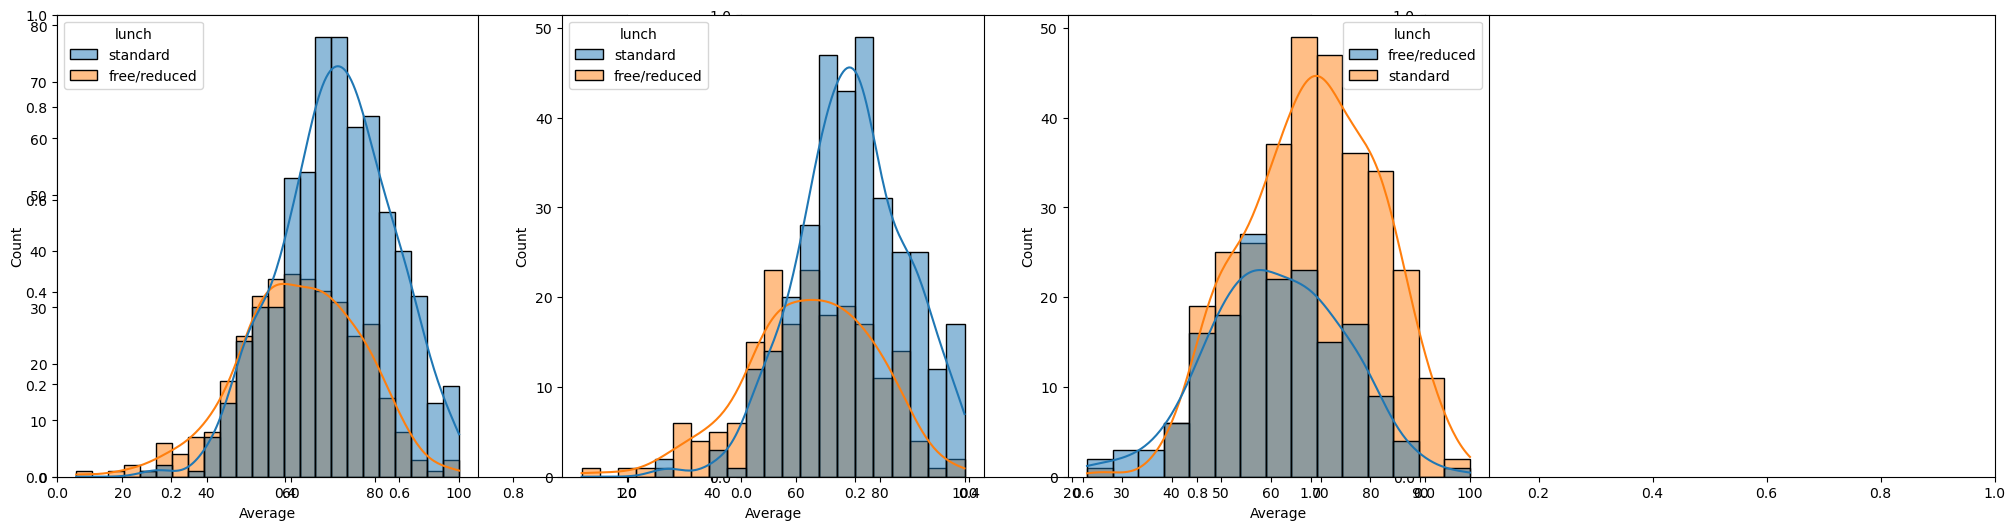

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

Irrespective of gender, students opting for standard lunch seem to perform significantly better compared to those having free/reduced lunch

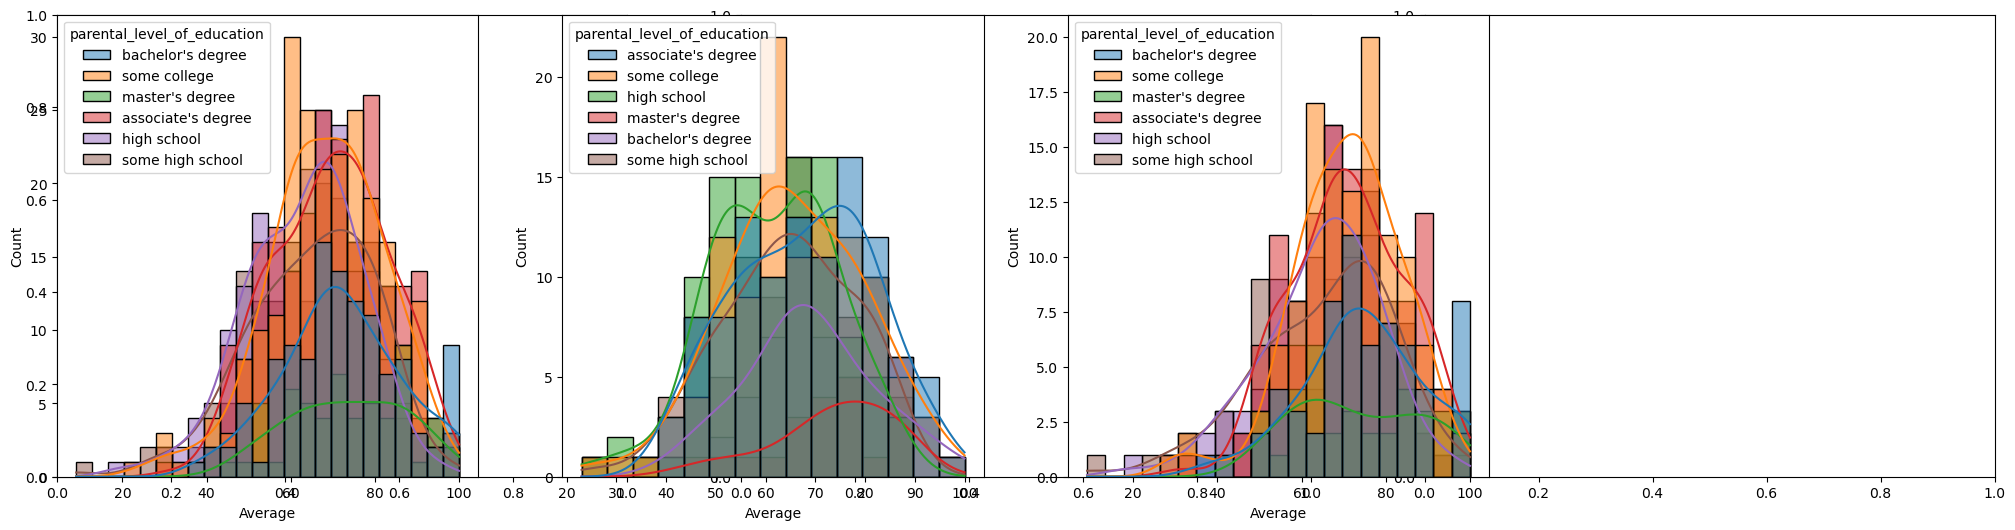

In [73]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

Parents' level of education does not seem to significantly impact students' performance overall. 

Interestingly, those with parents holding a master's degree tend to perform slightly lower, while students whose parents attended college appear to perform the best among all groups.

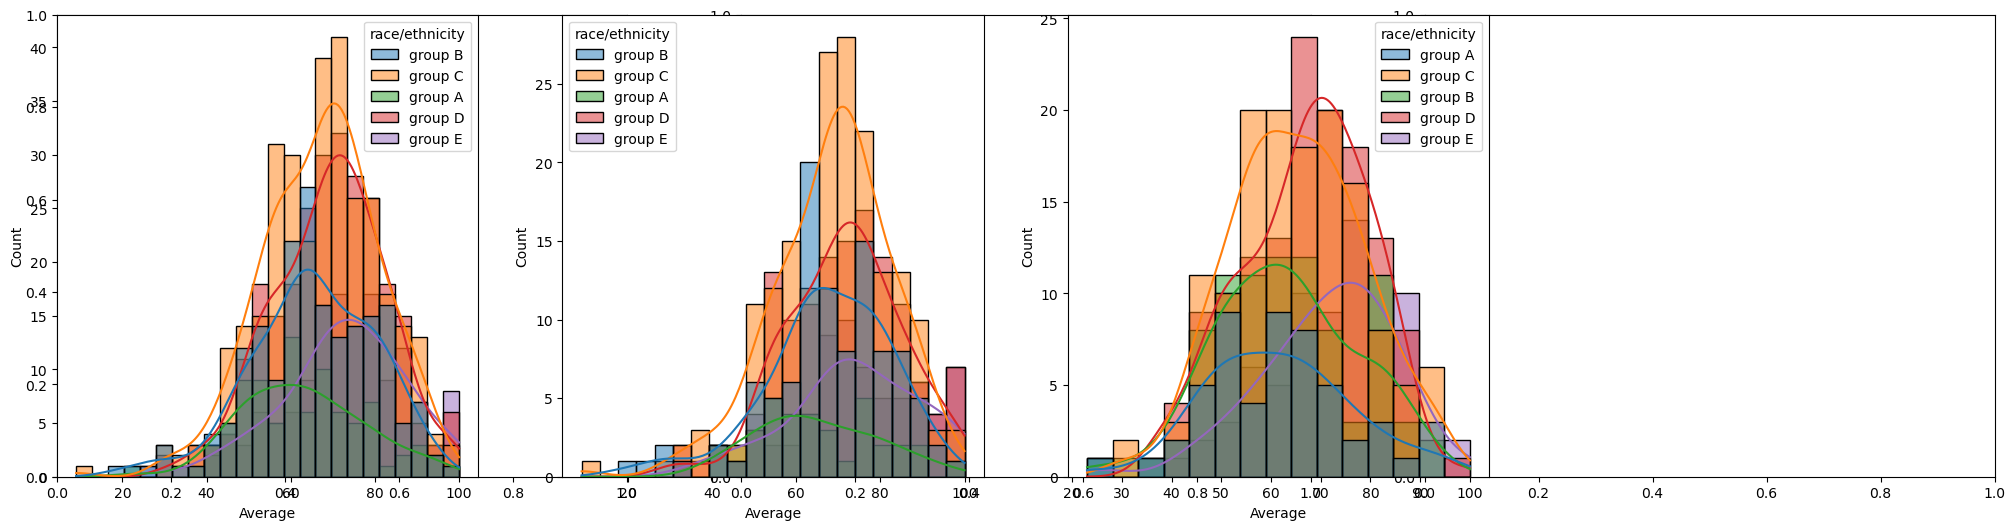

In [96]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()

Students of group C tend to perform well irrespective of gender. Males of group D perform as well as those of group C.
Students of group A tend to perform poorly. 

Students who get standard lunch seem to perform significantly better than those who take free/reduced lunch

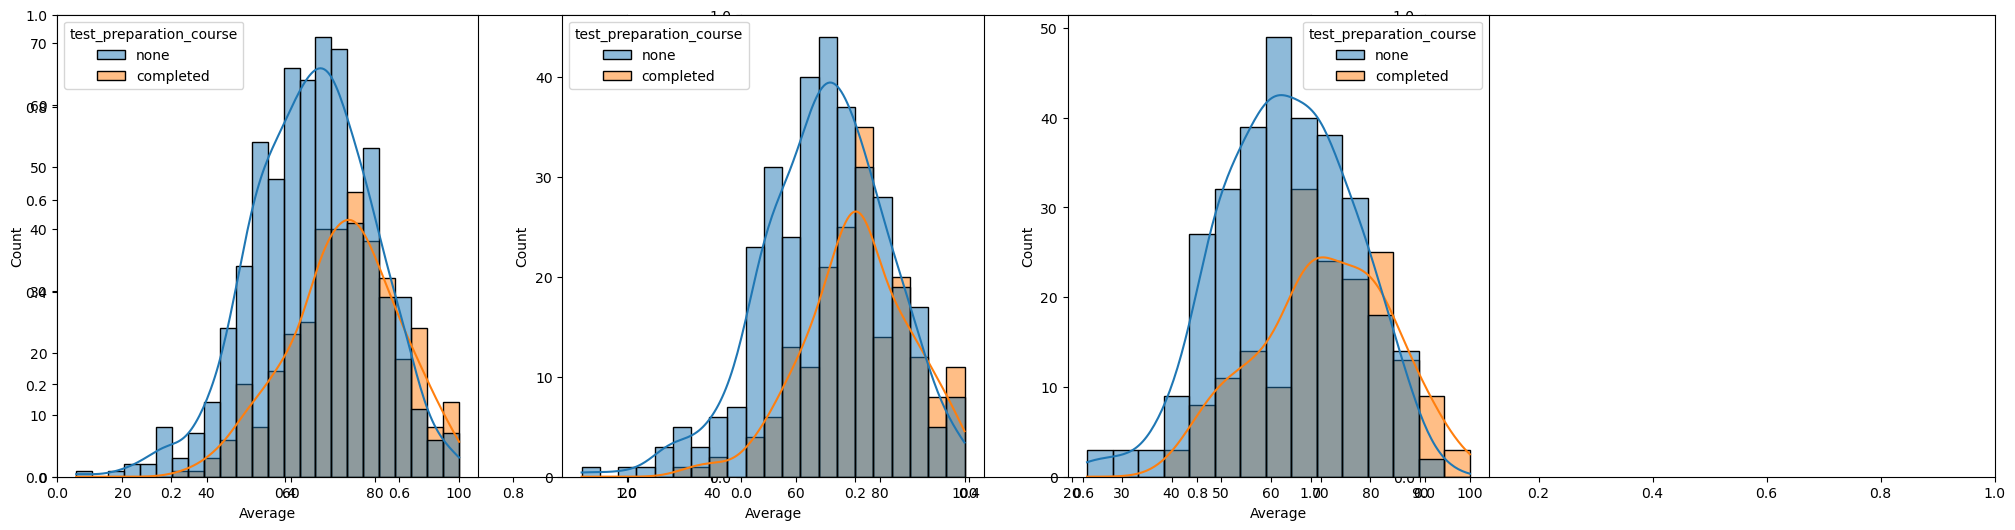

In [99]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='test_preparation_course')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='test_preparation_course')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='test_preparation_course')
plt.show()

Students who have completed the test course tend to achieve higher scores. However, the group of students who have not completed the course shows a higher average score. This discrepancy may be attributed to the fact that the number of students who haven't completed the course is larger, potentially influencing the overall average.

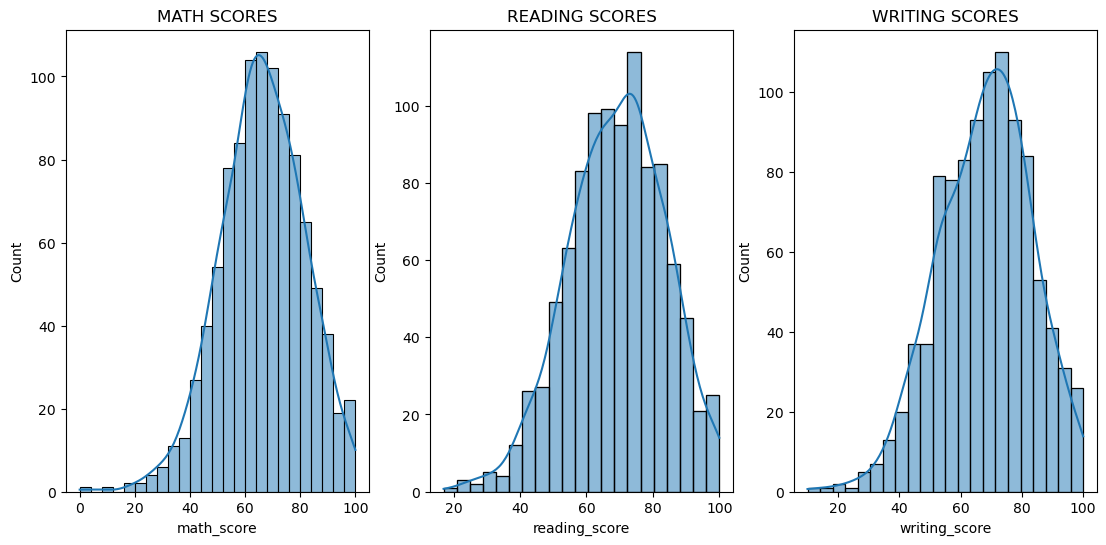

In [84]:
plt.figure(figsize=(18,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.histplot(x='math_score',data=df,kde = True)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.histplot(x='reading_score',data=df,kde = True)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.histplot(x='writing_score',data=df, kde = True)
plt.show()

All three columns nearly follow a gaussian distribution.  For all three test, most students have scored in the range of 60-80.

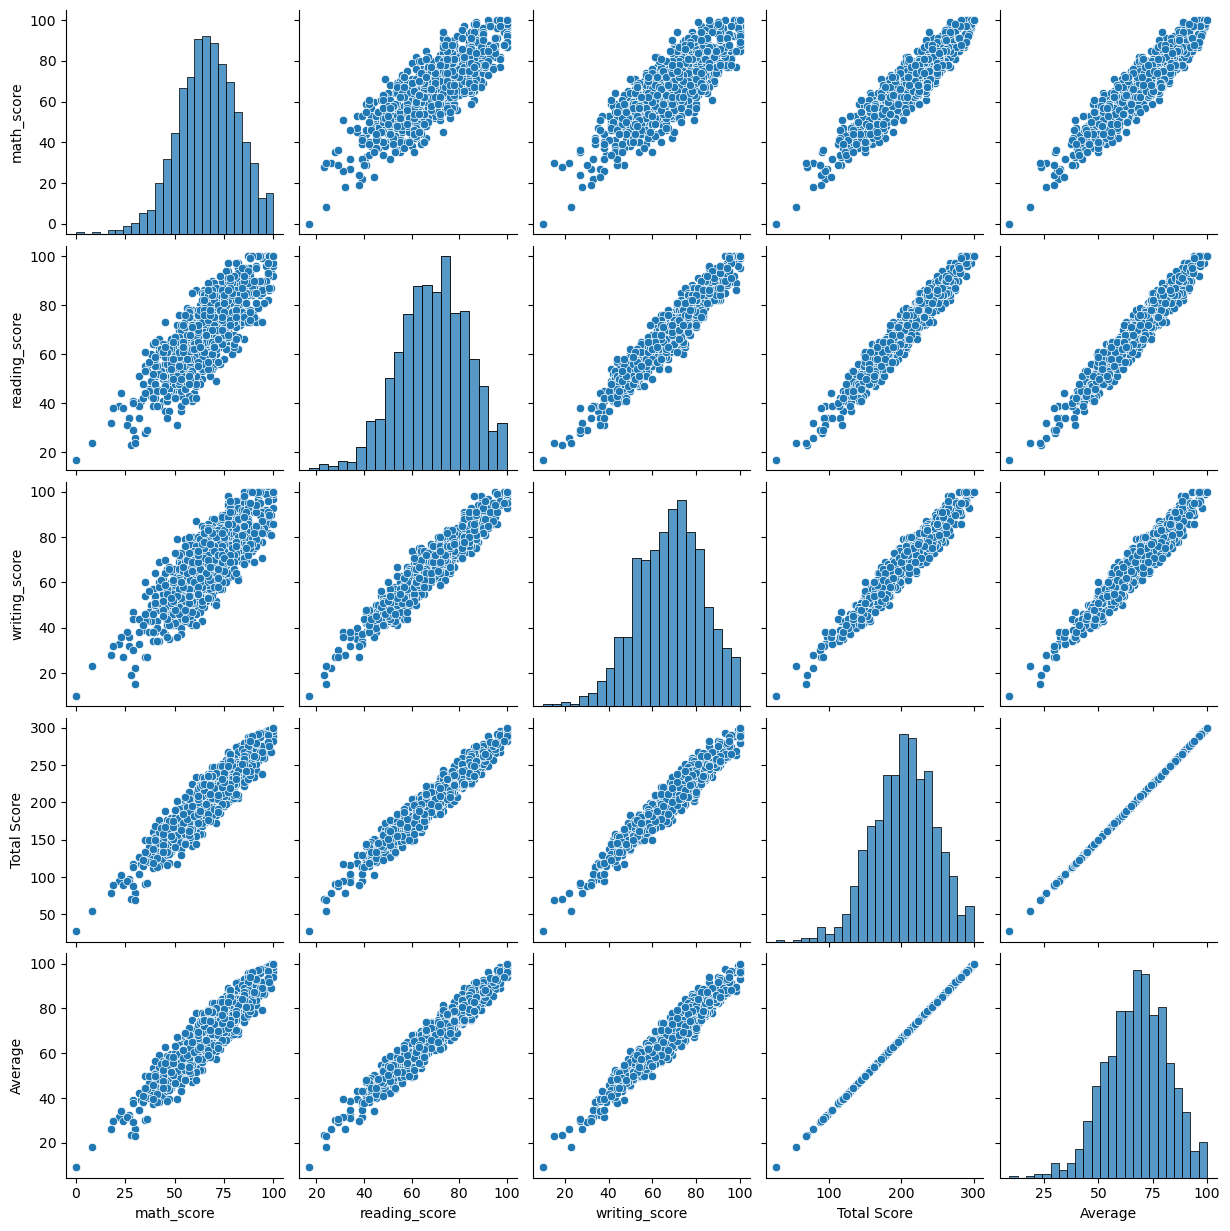

In [104]:
sns.pairplot(df)
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.

Conclusions:

* Females lead in pass percentage and also are top-scorers
* Student's Performance is related with lunch, race, parental level education
* Student's Performance is not much related with test preparation course